# <font color='green'> <b>Car Price Prediction Project</b><font color='black'>

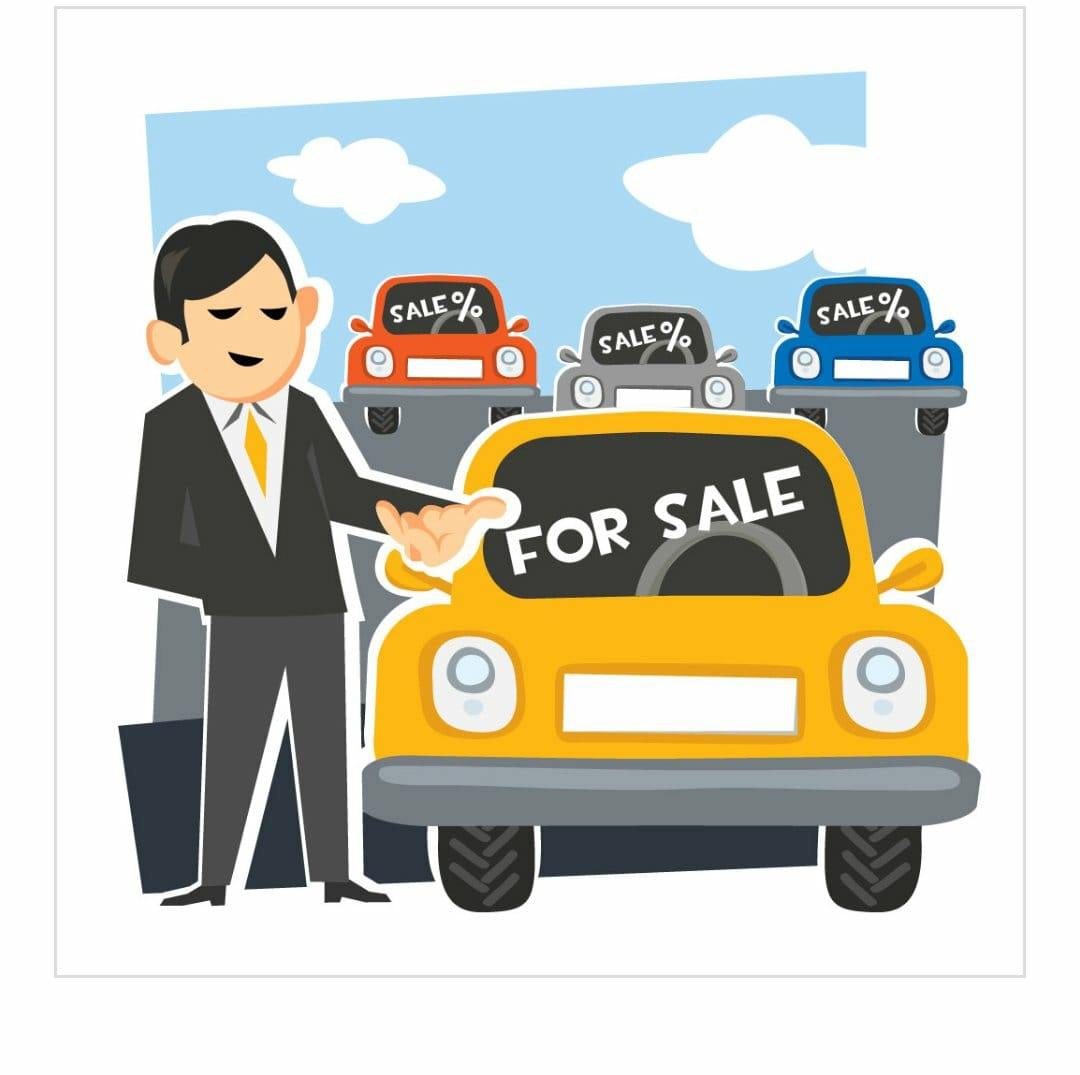

## <font color='blue'> <b>Import Library</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [2]:
df = pd.read_csv('final_scout_not_dummy.csv')

## <font color='blue'> <b>Data Preprocessing</b><font color='black'>

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.shape

(15915, 23)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [7]:
df[df.hp_kW <50]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
8407,Opel Corsa,Compact,12435,VAT deductible,21050.0,Used,Benzine,5.0,"Air conditioning,Cruise control,Electrically h...","Bluetooth,CD player,Hands-free equipment,On-bo...",...,1.0,44.0,1,Metallic,Cloth,Automatic,1364.0,1163.0,front,5.6
8853,Opel Corsa,Compact,7650,VAT deductible,142.0,New,Benzine,5.0,Air conditioning,"Bluetooth,Hands-free equipment,MP3,On-board co...",...,1.0,40.0,0,Metallic,Cloth,Manual,973.0,840.0,front,5.6
13755,Renault Clio,Compact,5890,VAT deductible,134500.0,Used,Diesel,5.0,"Air conditioning,Power windows","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,40.0,0,Metallic,Cloth,Manual,1461.0,1087.0,front,3.3


In [8]:
df.drop(index=[8407,8853, 13755] , inplace=True)

In [9]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15912,9,Audi A3,3097
body_type,15912,8,Sedans,8004
vat,15912,2,VAT deductible,15041
Type,15912,5,Used,11093
Fuel,15912,4,Benzine,8546
Comfort_Convenience,15912,6195,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15912,346,"Bluetooth,Hands-free equipment,On-board comput...",1736
Extras,15912,659,Alloy wheels,5783
Safety_Security,15912,4441,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15912,3,Metallic,15243


In [10]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## <font color='blue'> <b>Make Models</b><font color='black'>

In [11]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

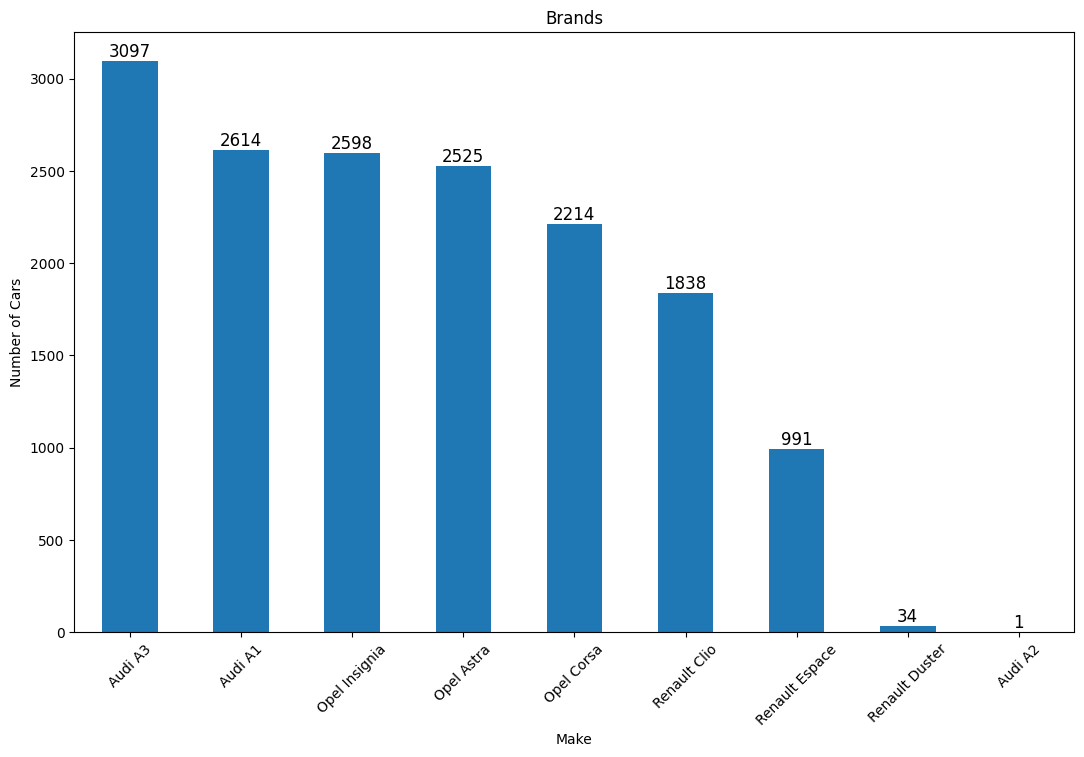

In [12]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Brands')   
plt.xlabel('Make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

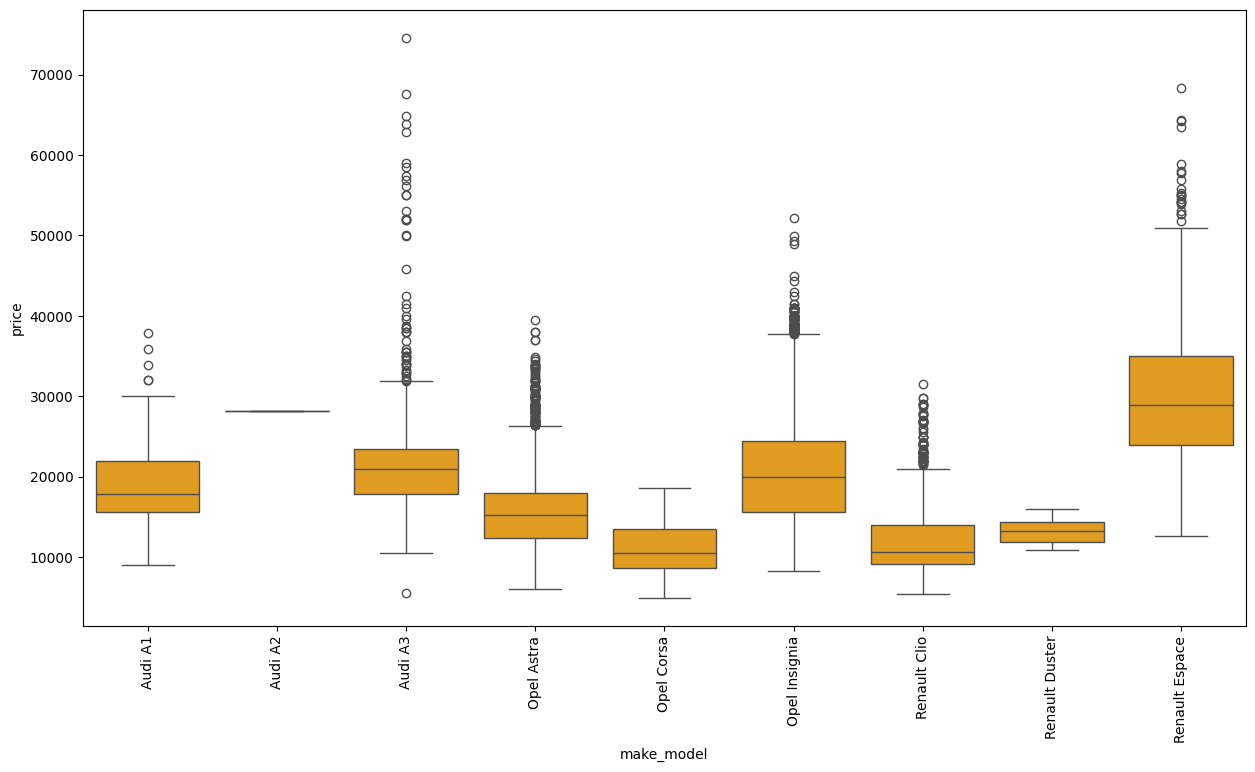

In [13]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Body Type</b><font color='black'>

In [14]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

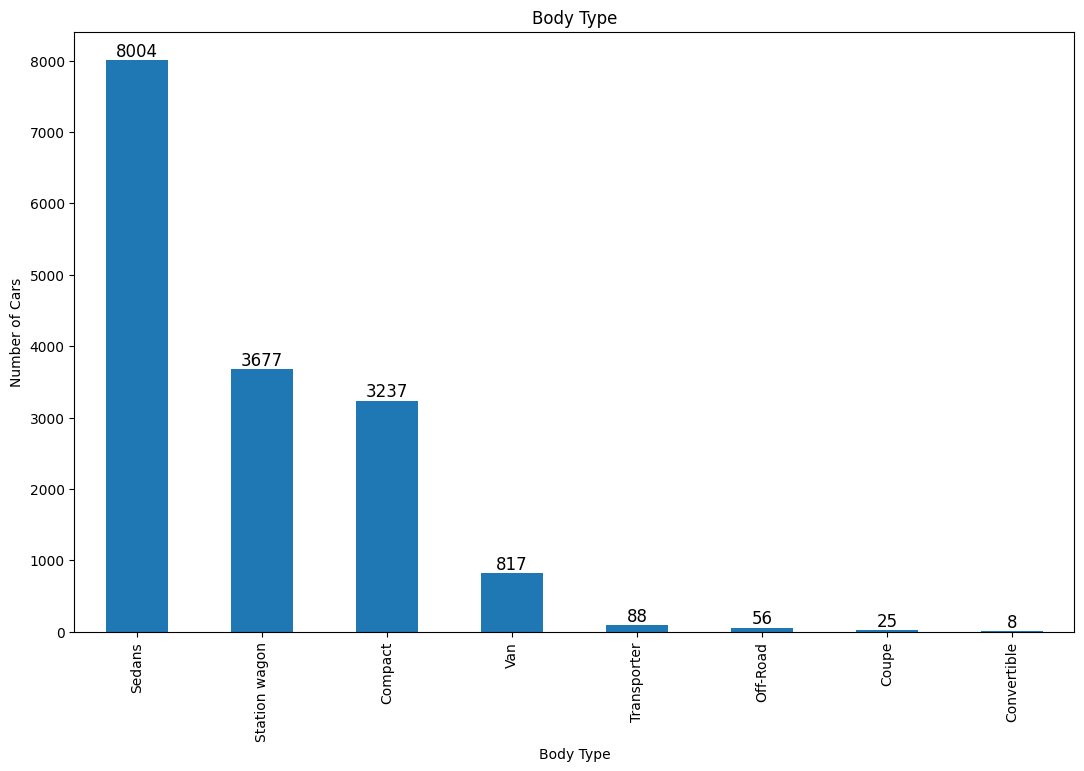

In [15]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.body_type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Body Type')   
plt.xlabel('Body Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [16]:
body_distr = df['body_type'].value_counts().reset_index(name='count')
body_distr.columns = ['body_type', 'count'] 

fig = px.pie(body_distr, values='count', names='body_type', title="Body Type Distribution")
fig.show()

## <font color='blue'> <b>Vat</b><font color='black'>

In [17]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable'], dtype=object)

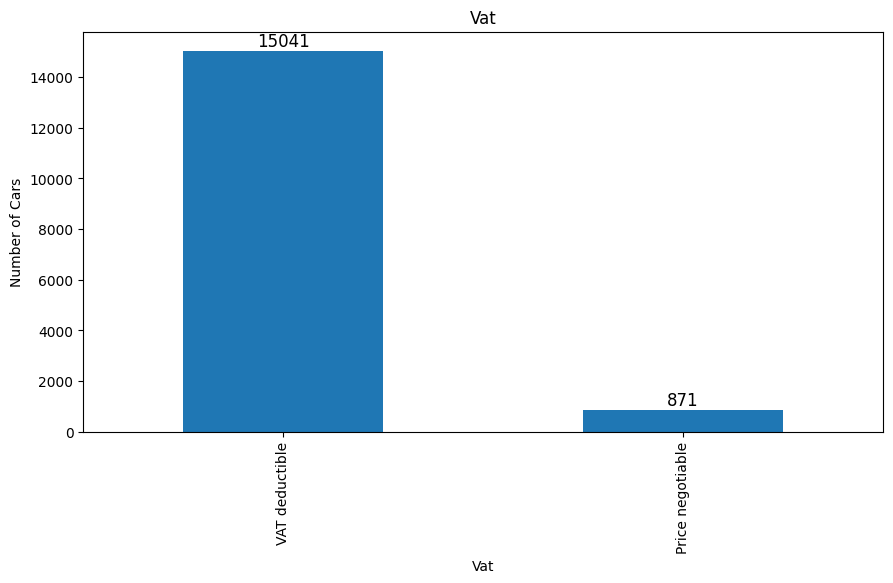

In [18]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_axes([0,0,1,1])
counts = df.vat.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vat')   
plt.xlabel('Vat') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Milage</b><font color='black'>

In [19]:
vc = df.km.value_counts()
print(f'max milace:{vc.max()}, average milage: {vc.mean()}, min milage: {vc.min()}')

max milace:1044, average milage: 2.3788309164299597, min milage: 1


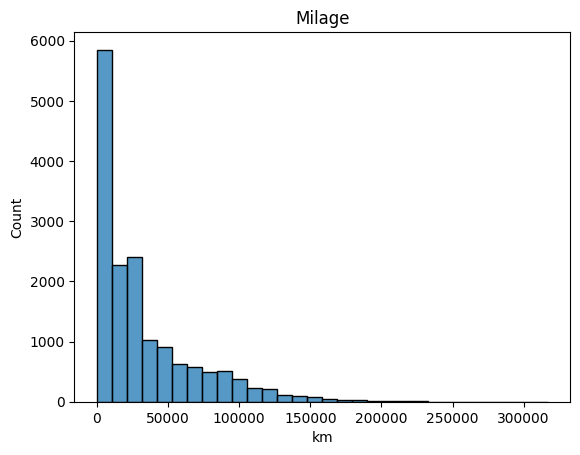

In [20]:
sns.histplot(data=df, x="km", bins=30)
plt.title('Milage');

## <font color='blue'> <b>Type</b><font color='black'>

In [21]:
df.Type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

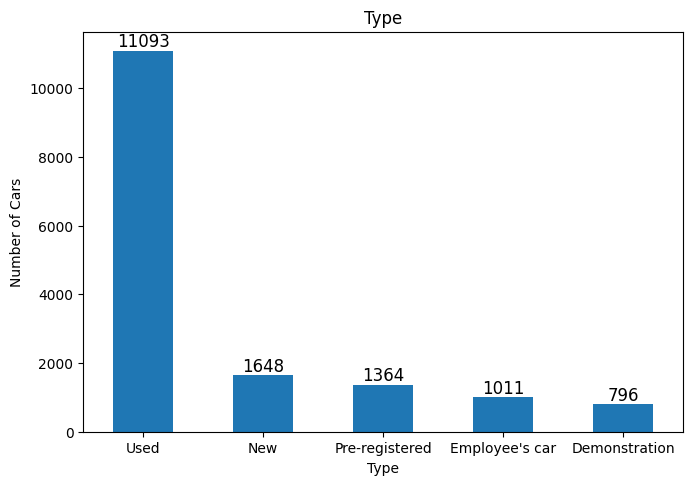

In [22]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Type')   
plt.xlabel('Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Fuel Type</b><font color='black'>

In [23]:
df.Fuel.value_counts()

Fuel
Benzine     8546
Diesel      7297
LPG/CNG       64
Electric       5
Name: count, dtype: int64

In [24]:
df[df["Fuel"] == "Electric"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
3356,Audi A3,Compact,24950,VAT deductible,57000.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...",...,1.0,150.0,0,Metallic,Part/Full Leather,Semi-automatic,1400.0,1280.0,front,4.1
3612,Audi A3,Sedans,38450,Price negotiable,13800.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...",...,1.0,110.0,0,Metallic,Cloth,Semi-automatic,1395.0,1615.0,front,4.0
3615,Audi A3,Sedans,35899,Price negotiable,20880.0,Used,Electric,6.0,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",...,1.0,110.0,0,Metallic,Cloth,Semi-automatic,1395.0,1615.0,front,4.0
3617,Audi A3,Sedans,38000,Price negotiable,12000.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...",...,1.0,110.0,0,Metallic,Part/Full Leather,Semi-automatic,1395.0,1615.0,front,4.0
13393,Renault Clio,Sedans,8490,VAT deductible,23863.0,Used,Electric,6.0,"Air conditioning,Cruise control,Navigation system",On-board computer,...,1.0,55.0,0,Metallic,Part/Full Leather,Automatic,1461.0,1165.0,front,5.0


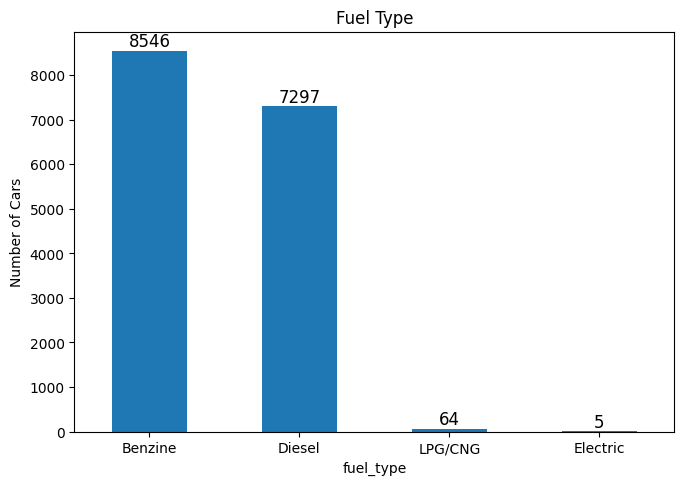

In [25]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Fuel.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Gears</b><font color='black'>

In [26]:
df.Gears.unique()

array([7., 6., 5., 8.])

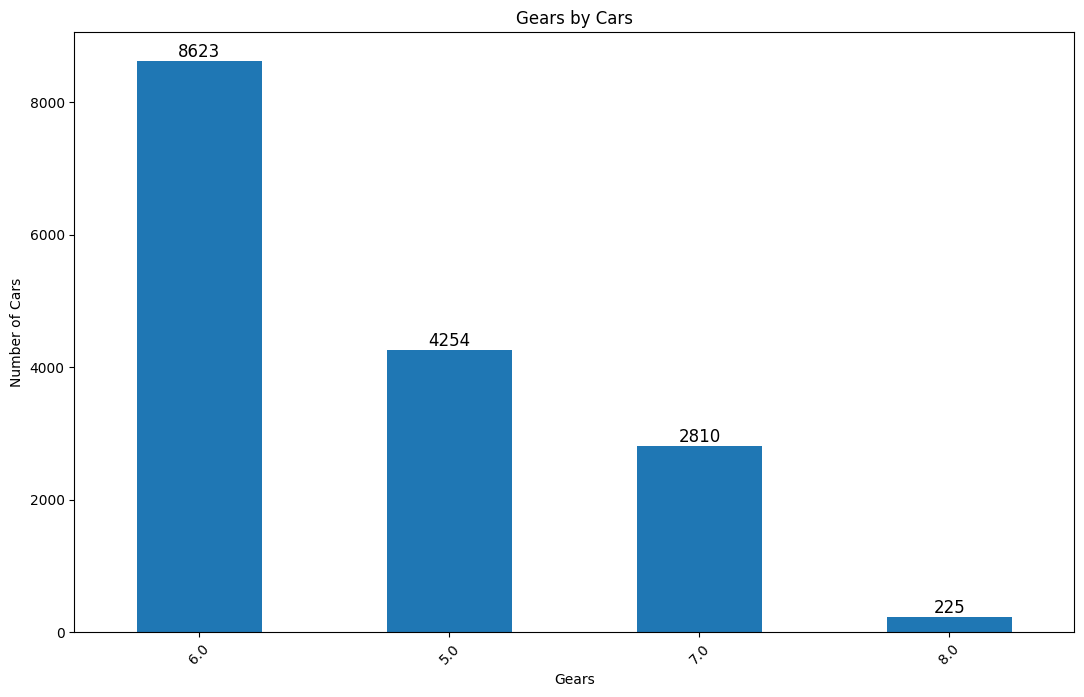

In [27]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.Gears.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Gears by Cars')   
plt.xlabel('Gears') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Comfort & Convenience</b><font color='black'>

In [28]:
df.Comfort_Convenience.nunique() # Since there are many values in this columns, it needs to be encoded

6195

In [29]:
cc = df.Comfort_Convenience.str.get_dummies(sep=",")
cc.tail()

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,...,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
15910,1,0,0,1,0,1,0,0,1,1,...,1,1,0,0,1,1,0,1,0,0
15911,1,0,0,1,0,1,0,1,1,0,...,1,1,1,0,0,0,1,0,0,0
15912,1,0,1,1,0,1,0,1,1,0,...,1,1,1,1,0,0,1,0,0,0
15913,1,0,0,1,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
15914,1,0,0,1,0,1,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [30]:
df = df.join(cc)
df.drop(['Comfort_Convenience'], inplace=True, axis=1)
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Entertainment_Media,Extras,...,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.0,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control",...,1,1,1,0,0,1,0,0,0,0
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.0,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...",...,1,0,0,0,0,1,0,1,0,0
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.0,"MP3,On-board computer","Alloy wheels,Voice Control",...,1,0,1,0,0,1,0,0,0,0
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.0,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control",...,1,1,1,0,1,1,0,0,0,0
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.0,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...",...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,"Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen",...,1,1,0,0,1,1,0,1,0,0
15911,Renault Espace,Van,39885,VAT deductible,9900.000000,Used,Benzine,7.0,"Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control",...,1,1,1,0,0,0,1,0,0,0
15912,Renault Espace,Van,39875,VAT deductible,15.000000,Pre-registered,Diesel,6.0,"Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,...,1,1,1,1,0,0,1,0,0,0
15913,Renault Espace,Van,39700,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen",...,1,0,0,0,0,1,0,0,0,0


## <font color='blue'> <b>Entertainment & Media</b><font color='black'>

In [31]:
df.Entertainment_Media.nunique()

346

In [32]:
em = df.Entertainment_Media.str.get_dummies(sep=",")
em.tail()

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
15910,1,0,1,1,0,1,1,0,0,1
15911,1,0,1,1,0,0,1,0,0,1
15912,1,0,0,1,0,1,1,0,0,0
15913,1,0,1,0,0,0,1,0,0,1
15914,0,0,0,0,0,0,0,0,0,1


In [33]:
df = df.join(em)
df.drop(['Entertainment_Media'], inplace=True, axis=1)

In [34]:
df.shape

(15912, 69)

## <font color='blue'> <b>Extras</b><font color='black'>

In [35]:
ex = df.Extras.str.get_dummies(sep=",")
ex.tail()

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
15910,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15911,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15912,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
df = df.join(ex)
df.drop(['Extras'], inplace=True, axis=1)

In [37]:
df.shape

(15912, 85)

## <font color='blue'> <b>Safety Security</b><font color='black'>

In [38]:
df.Safety_Security.unique()

array(['ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights',
       'ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights',
       'ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control',
       ...,
       'ABS,Blind spot monitor,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Hea

In [39]:
ss = df.Safety_Security.str.get_dummies(sep=",")
ss.tail()

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,...,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
15910,1,0,0,0,0,1,1,0,0,1,...,1,0,1,1,1,1,1,1,1,0
15911,1,1,0,0,1,1,0,1,0,1,...,1,0,1,1,0,1,1,1,1,0
15912,1,1,0,0,1,1,0,1,0,1,...,1,0,1,1,0,1,0,1,1,0
15913,1,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,1,1,0,1,0
15914,1,0,0,0,1,0,0,1,0,1,...,0,0,1,1,0,1,1,0,1,0


In [40]:
df = df.join(ss)
df.drop(['Safety_Security'], inplace=True, axis=1)

In [41]:
df.shape

(15912, 113)

## <font color='blue'> <b>Age</b><font color='black'>

In [42]:
df.age.value_counts()

age
1.0    4525
0.0    4432
3.0    3678
2.0    3277
Name: count, dtype: int64

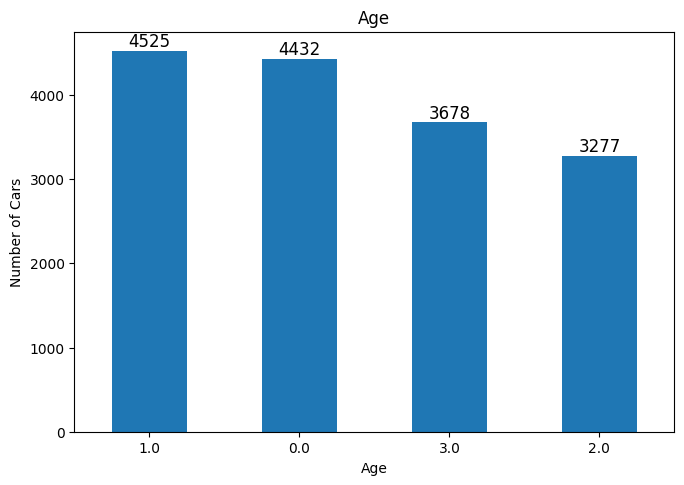

In [43]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.age.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Age')   
plt.xlabel('Age') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

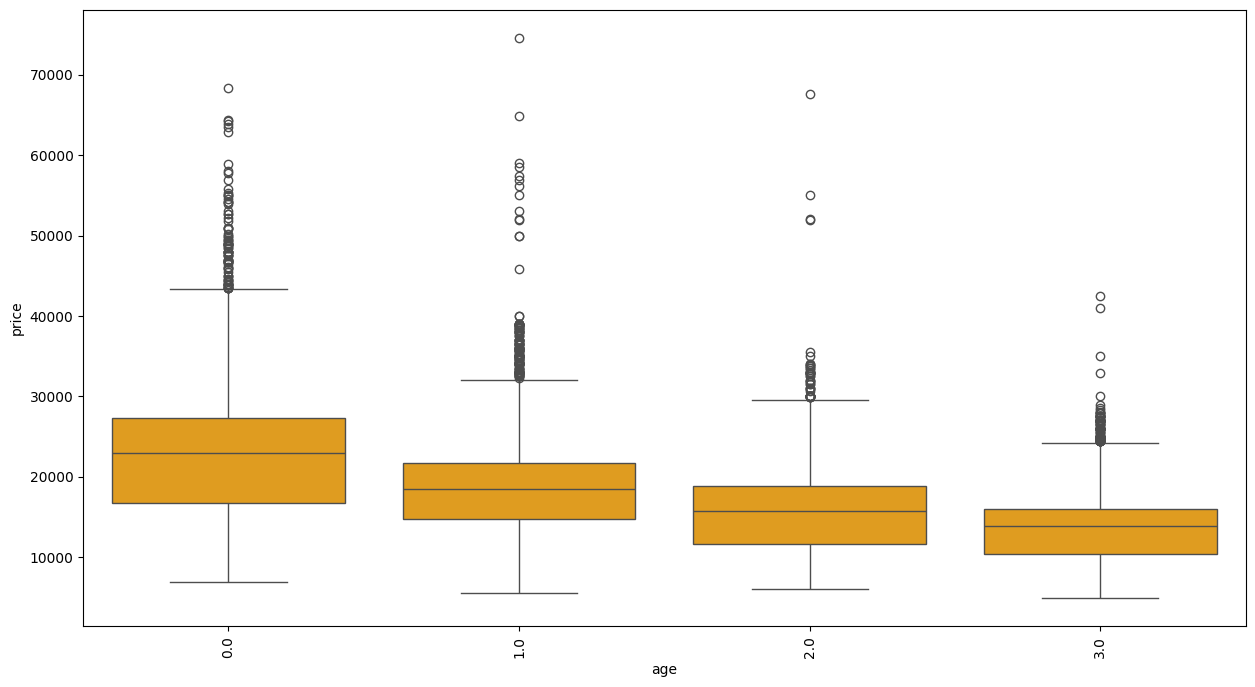

In [44]:
plt.figure(figsize = (15,8))
sns.boxplot(x="age", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Previous Owners</b><font color='black'>

In [45]:
df.Previous_Owners.unique()

array([2., 1., 0., 3., 4.])

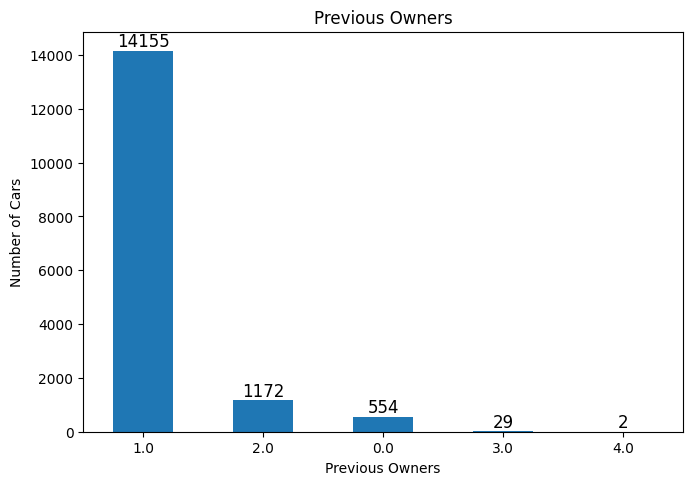

In [46]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Previous_Owners.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Previous Owners')   
plt.xlabel('Previous Owners') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

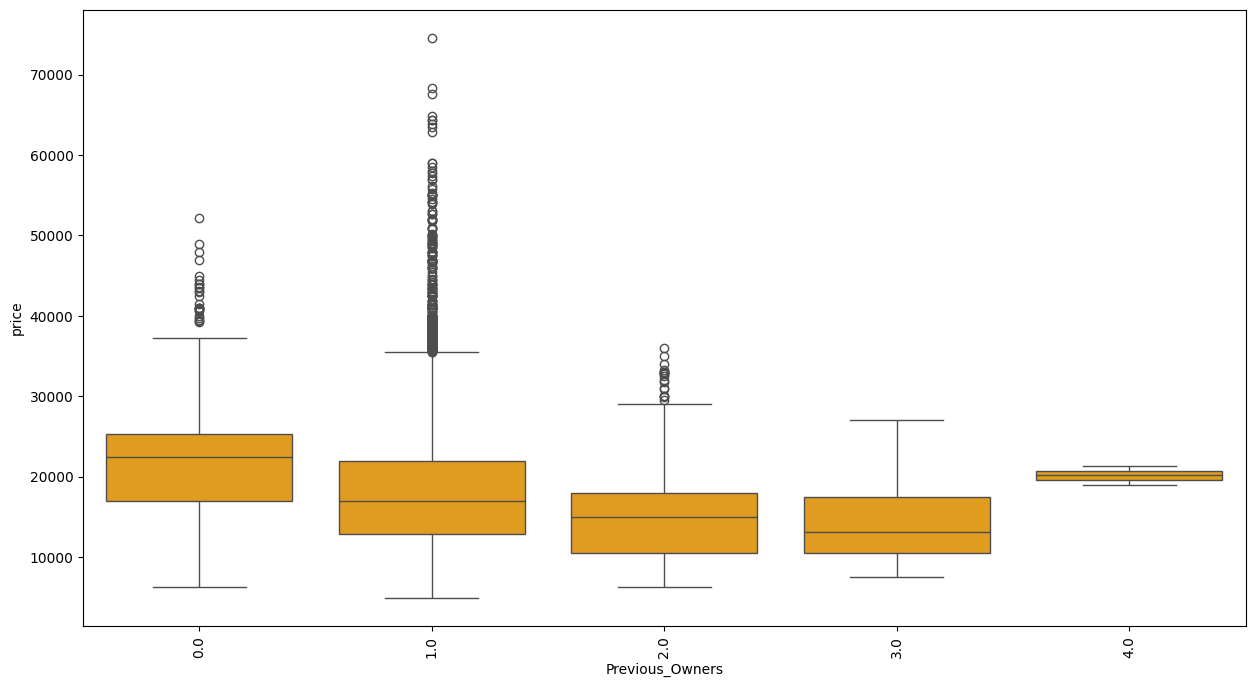

In [47]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Previous_Owners", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Power (hp_kW)</b><font color='black'>

In [48]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137., 133.,  77., 101.,  78., 103.,  74.,
       118.,  84.,  88.,  80.,  76., 149.,  51.,  55.,  52.,  63.,  65.,
        75., 125., 120., 184., 239., 121., 143., 191.,  89., 195., 127.,
       122., 154., 155., 104., 123., 146.,  90.,  56.,  53.,  54., 164.,
       163.,  57., 119., 165., 117., 115.,  98., 168., 167.])

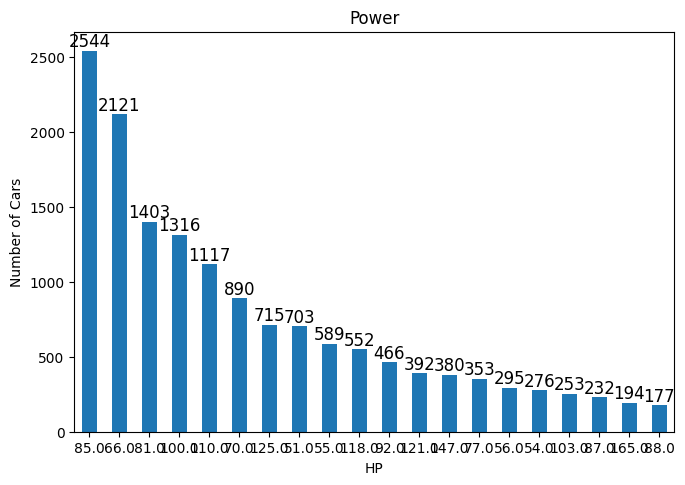

In [49]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.hp_kW.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Power')   
plt.xlabel('HP') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

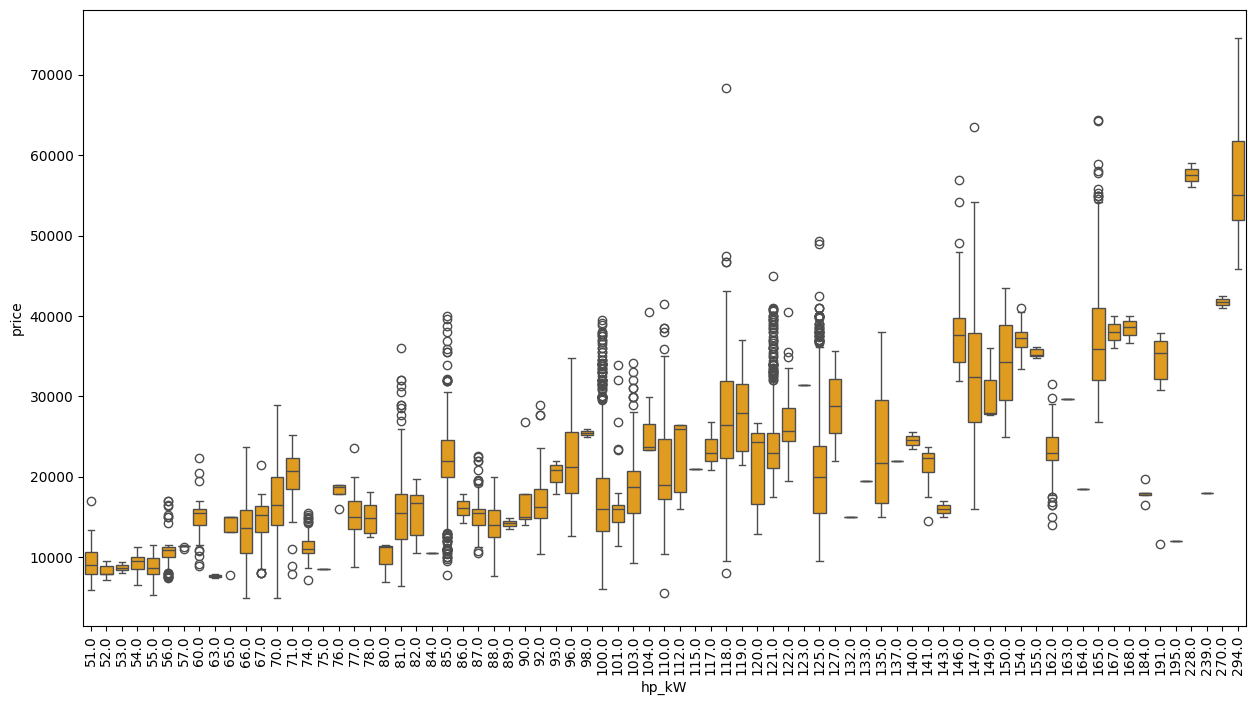

In [50]:
plt.figure(figsize = (15,8))
sns.boxplot(x="hp_kW", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Paint Type</b><font color='black'>

In [51]:
df.Paint_Type.unique()

array(['Metallic', 'Uni/basic', 'Perl effect'], dtype=object)

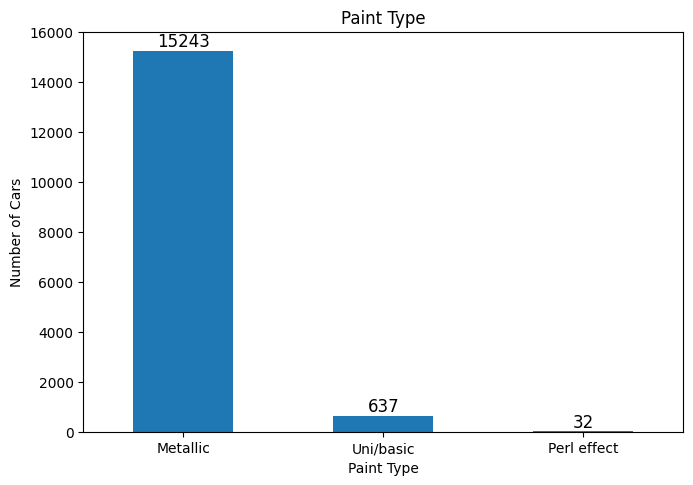

In [52]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Paint_Type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Paint Type')   
plt.xlabel('Paint Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

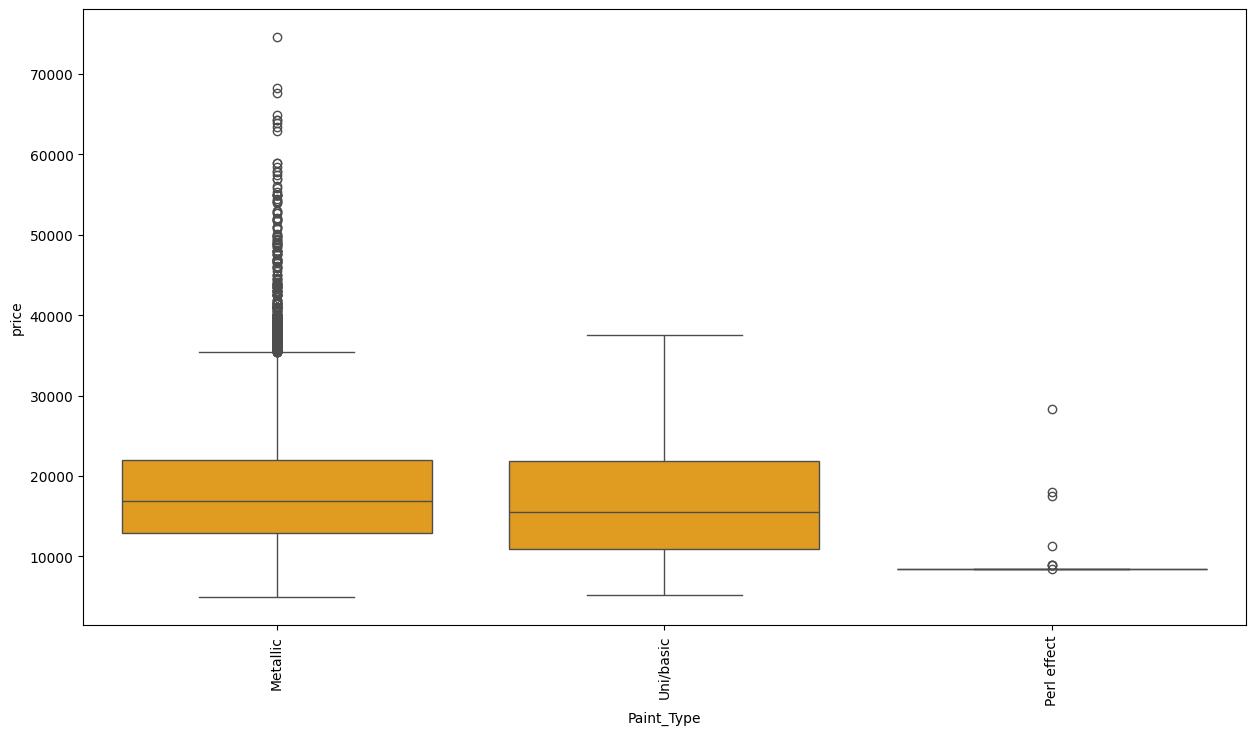

In [53]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Paint_Type", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Upholstery Type</b><font color='black'>

In [54]:
df.Upholstery_type.unique()

array(['Cloth', 'Part/Full Leather'], dtype=object)

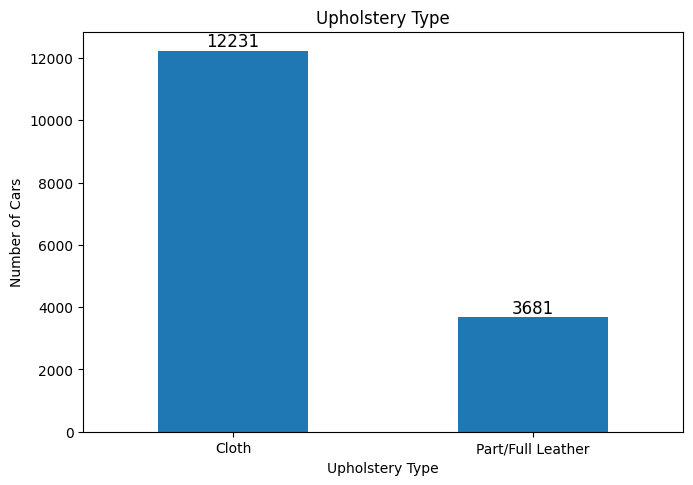

In [55]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Upholstery_type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Upholstery Type')   
plt.xlabel('Upholstery Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

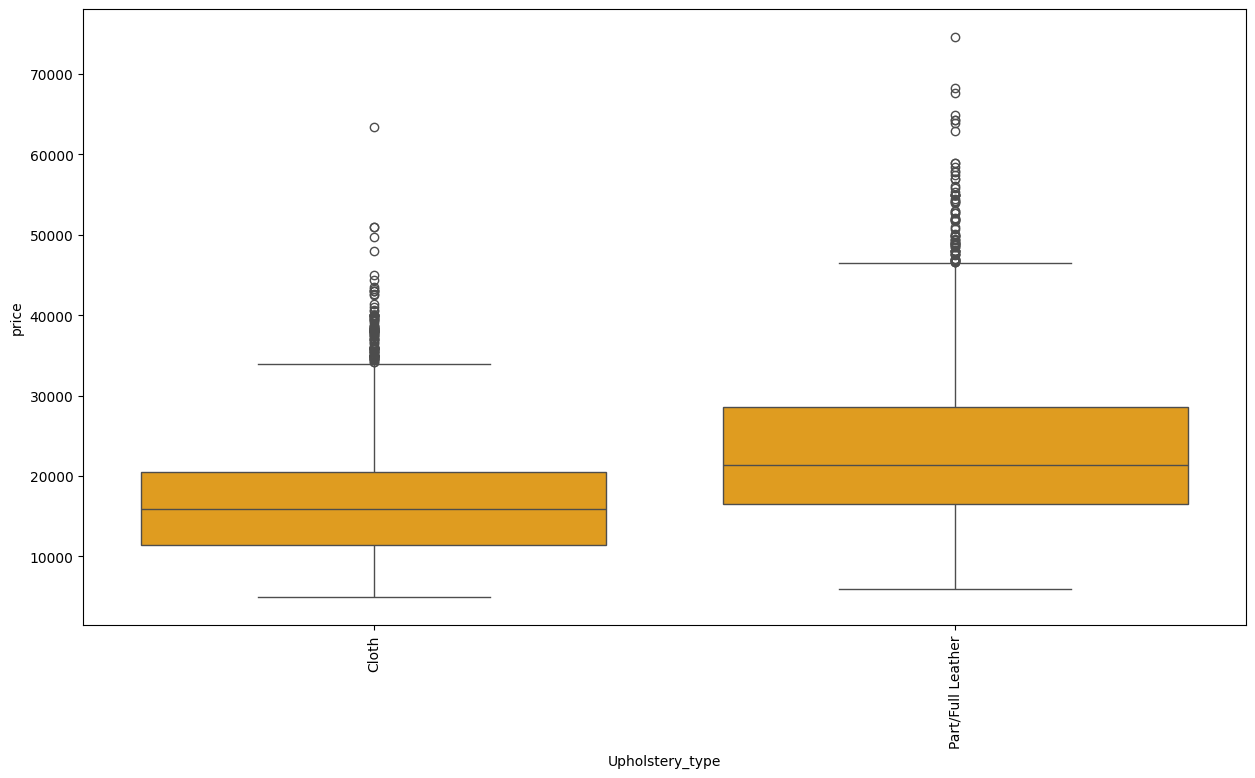

In [56]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Upholstery_type", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Gearing Type</b><font color='black'>

In [57]:
df.Gearing_Type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

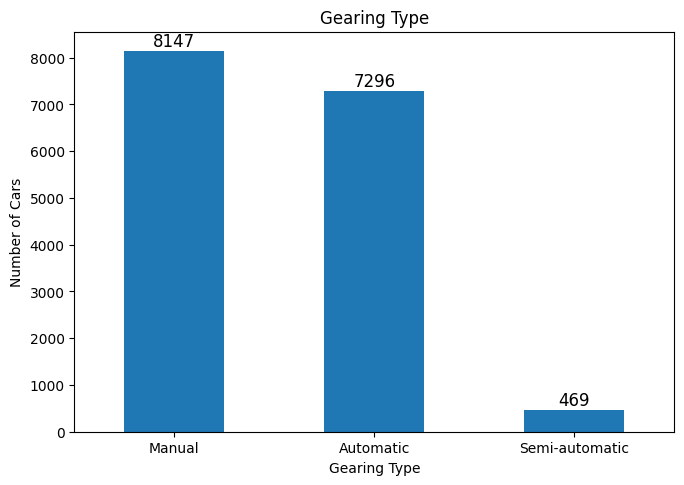

In [58]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Gearing_Type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Gearing Type')   
plt.xlabel('Gearing Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

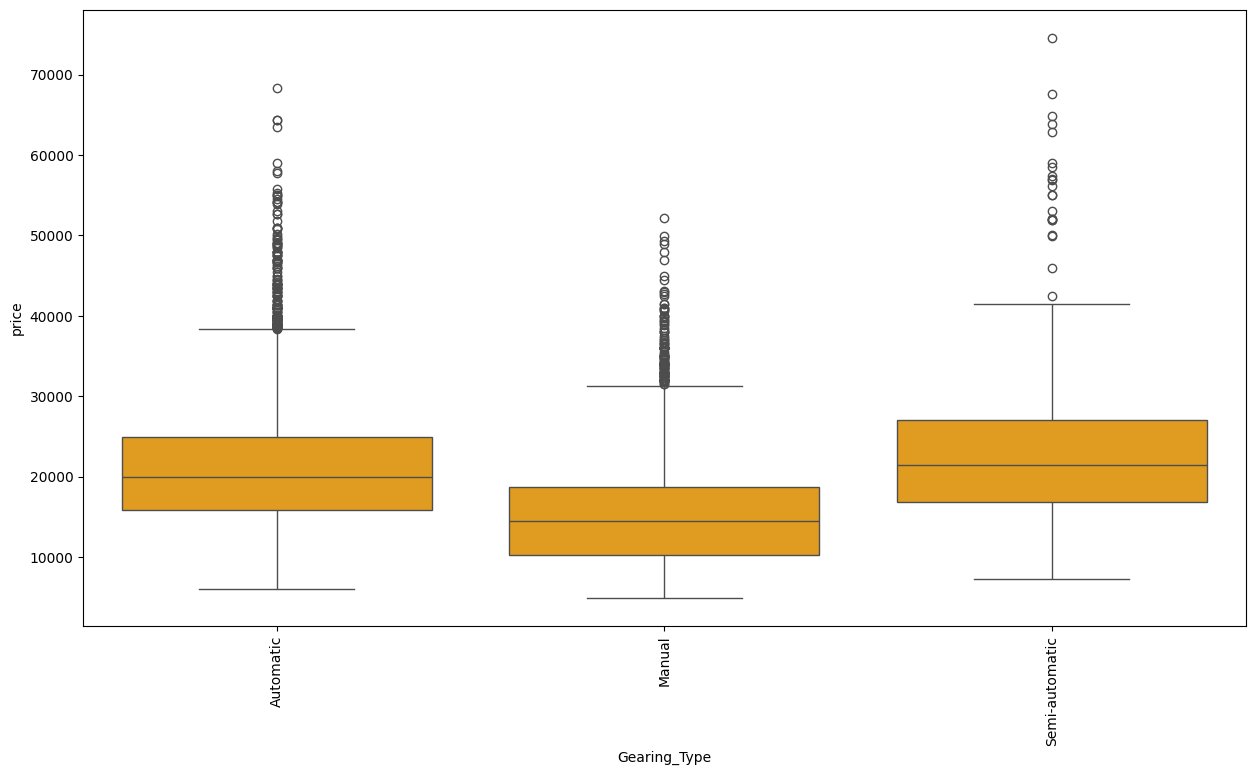

In [59]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Gearing_Type", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Displacement</b><font color='black'>

In [60]:
df.Displacement_cc.unique()

array([1422., 1798., 1598.,  999., 1395.,  929., 1596., 1600., 1000.,
       1984., 1498., 1197.,  995.,  998., 1968., 1400., 2000., 1568.,
       1896., 2480., 1499., 1495., 1398., 1584.,  997., 1399., 1364.,
       1490.,  996., 1696., 1686., 1396., 1368., 1397., 1248., 1229.,
       1300., 1200., 1239., 1350., 1369., 1390., 1198., 1195., 1956.,
       1998., 2967., 1856., 1500., 1496., 1533., 1599., 1995., 1461.,
       1618., 1149., 1199.,  898.,  890.,  900., 1100., 1333.,  899.,
       1589., 1580., 1997., 1800.])

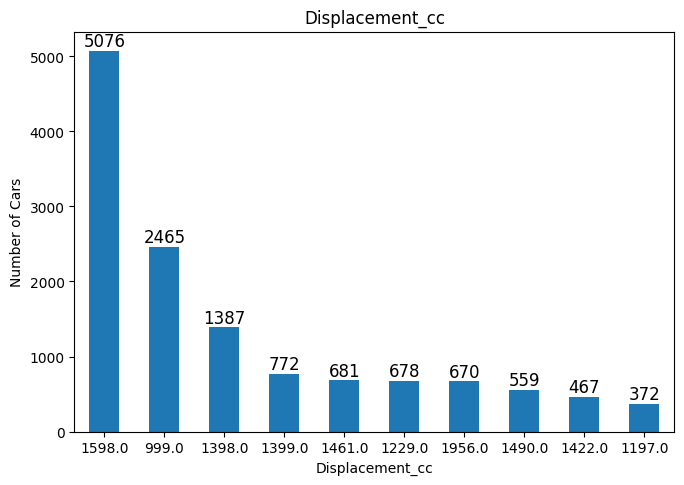

In [61]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Displacement_cc.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('Displacement_cc')   
plt.xlabel('Displacement_cc') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Weight</b><font color='black'>

In [62]:
df.Weight_kg.value_counts(ascending=False)

Weight_kg
1163.0    1581
1360.0    1419
1487.0     967
1135.0     837
1425.0     744
          ... 
1258.0       1
1167.0       1
1331.0       1
1132.0       1
2037.0       1
Name: count, Length: 431, dtype: int64

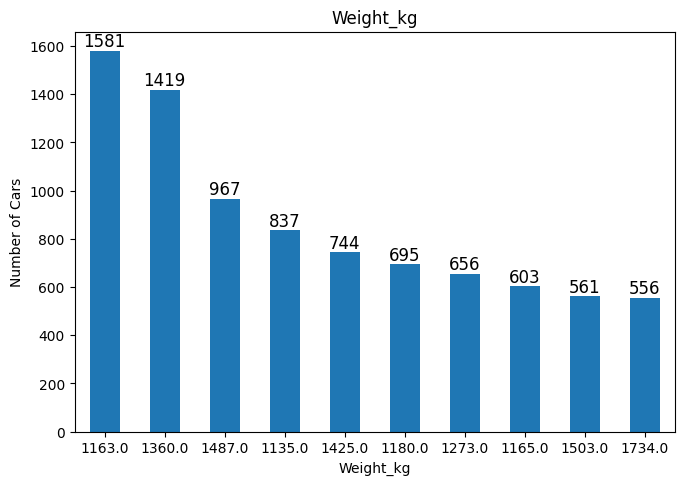

In [63]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Weight_kg.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('Weight_kg')   
plt.xlabel('Weight_kg') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Drive Chain</b><font color='black'>

In [64]:
df.Drive_chain.unique()

array(['front', '4WD', 'rear'], dtype=object)

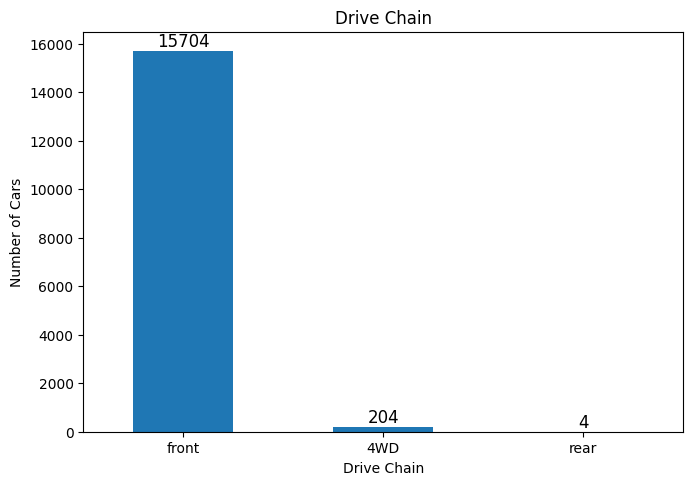

In [65]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Drive_chain.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Drive Chain')   
plt.xlabel('Drive Chain') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>cons_comb</b><font color='black'>

In [66]:
df.cons_comb.value_counts(ascending=False)

cons_comb
4.00    1020
5.60     961
5.40     900
5.00     810
4.70     766
        ... 
5.45       2
4.55       2
9.10       1
4.30       1
7.50       1
Name: count, Length: 62, dtype: int64

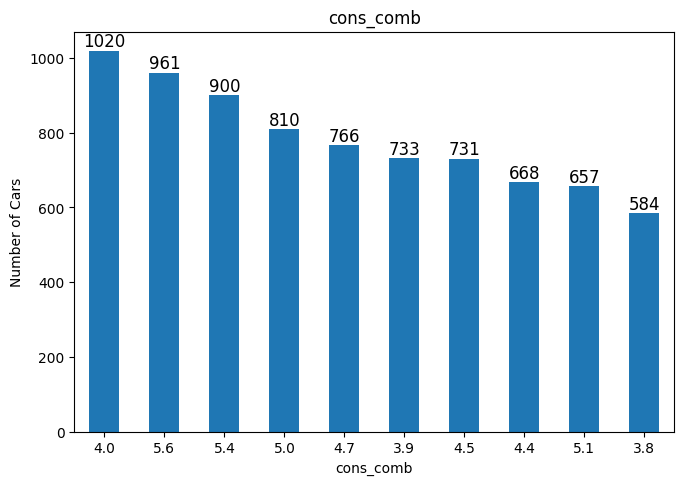

In [67]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cons_comb.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('cons_comb')   
plt.xlabel('cons_comb') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Price</b><font color='black'>

In [68]:
df[df.age == 0]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,...,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
122,Audi A1,Compact,18730,VAT deductible,1.000000,New,Benzine,7.0,0.0,1.0,...,0,0,1,1,0,1,0,0,0,0
707,Audi A1,Sedans,32000,VAT deductible,1.000000,Pre-registered,Benzine,7.0,0.0,1.0,...,0,0,1,1,0,1,1,1,0,0
710,Audi A1,Compact,31990,VAT deductible,10.000000,New,Benzine,7.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
713,Audi A1,Sedans,37900,VAT deductible,7000.000000,Used,Benzine,6.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,0
732,Audi A1,Sedans,35900,VAT deductible,200.000000,Pre-registered,Benzine,7.0,0.0,1.0,...,0,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,0.0,1.0,...,1,0,1,1,1,1,1,1,1,0
15911,Renault Espace,Van,39885,VAT deductible,9900.000000,Used,Benzine,7.0,0.0,1.0,...,1,0,1,1,0,1,1,1,1,0
15912,Renault Espace,Van,39875,VAT deductible,15.000000,Pre-registered,Diesel,6.0,0.0,1.0,...,1,0,1,1,0,1,0,1,1,0
15913,Renault Espace,Van,39700,VAT deductible,10.000000,Pre-registered,Diesel,6.0,0.0,1.0,...,0,0,1,1,0,1,1,0,1,0


In [69]:
df[df.price == df.price.min()]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,...,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
8825,Opel Corsa,Sedans,4950,VAT deductible,179521.0,Used,Diesel,5.0,3.0,1.0,...,0,0,1,1,0,1,1,0,0,0


In [70]:
df[df.price == df.price.max()]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,...,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
3648,Audi A3,Sedans,74600,VAT deductible,13000.0,Used,Benzine,7.0,1.0,1.0,...,1,0,1,1,0,1,1,1,0,0


In [71]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr().style.applymap(color_correlation1)

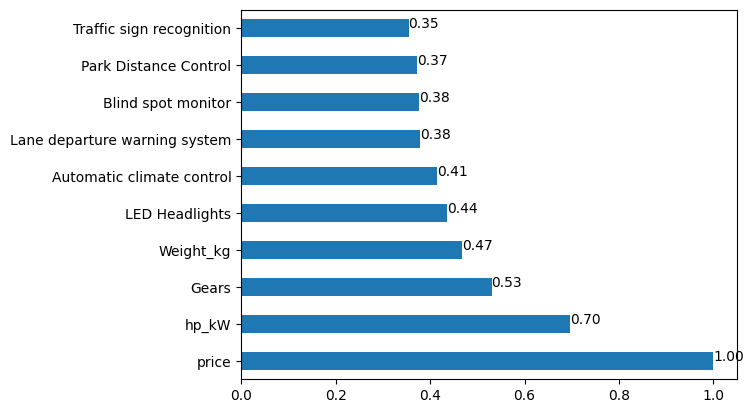

In [72]:
corr_values = numeric_df.corr()["price"].sort_values(ascending=False).head(10)
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

## <font color='blue'> <b>Encoding</b><font color='black'>

In [73]:
df.isnull().sum().sum()

0

In [74]:
from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()
cols = ['make_model', 'body_type', 'vat','Type', 'Fuel',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']

for col in cols:
    df[col] = LE.fit_transform(df[col])

In [75]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,...,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,0,4,15770,1,56013.0,4,1,7.0,3.0,2.0,...,0,0,1,1,0,1,1,1,0,1
1,0,4,14500,0,80000.0,4,0,7.0,2.0,1.0,...,0,0,1,1,0,1,1,1,0,1
2,0,4,14640,1,83450.0,4,1,7.0,3.0,1.0,...,0,0,1,1,0,1,1,1,0,0
3,0,4,14500,1,73000.0,4,1,6.0,3.0,1.0,...,0,0,1,1,0,1,1,0,0,0
4,0,4,16790,1,16200.0,4,1,7.0,3.0,1.0,...,0,0,1,1,0,1,1,1,0,1


## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [76]:
X = df.drop(['price'], axis=1)# independent variable
y = df['price'] # dependent variable

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [78]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12729, 112)
Train target shape   :  (12729,)
Test features shape  :  (3183, 112)
Test target shape    :  (3183,)


## <font color='blue'> <b>Scaling</b><font color='black'>

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [80]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 76%|███████▌  | 32/42 [07:35<00:31,  3.12s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [09:29<00:06,  6.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 12729, number of used features: 107
[LightGBM] [Info] Start training from score 18041.147301


100%|██████████| 42/42 [09:30<00:00, 13.59s/it]


In [81]:
models[:]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.95,1562.81,94.29
LGBMRegressor,0.95,0.95,1570.01,1.06
HistGradientBoostingRegressor,0.95,0.95,1577.42,3.23
XGBRegressor,0.95,0.95,1578.41,1.58
RandomForestRegressor,0.95,0.95,1604.63,66.13
BaggingRegressor,0.95,0.95,1610.16,7.16
GradientBoostingRegressor,0.93,0.93,1906.89,6.92
DecisionTreeRegressor,0.91,0.91,2175.68,1.02
ExtraTreeRegressor,0.89,0.89,2397.86,1.13


## <font color='blue'> <b>Linear Regression</b><font color='black'>

In [235]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [236]:
lr.fit(X_train, y_train)

LinearRegression()

In [237]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [239]:
lrr = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
lrr

,linear_train,linear_test
R2,8.448863e-01,8.410377e-01
mae,2.111075e+03,2.133080e+03
mse,8.531987e+06,8.324429e+06
rmse,2.920956e+03,2.885209e+03


## <font color='blue'> <b>RidgeCV</b><font color='black'>

In [240]:
from sklearn.linear_model import RidgeCV

In [241]:
alpha = np.linspace(10, 100, 100)
alpha

array([ 10.        ,  10.90909091,  11.81818182,  12.72727273,
        13.63636364,  14.54545455,  15.45454545,  16.36363636,
        17.27272727,  18.18181818,  19.09090909,  20.        ,
        20.90909091,  21.81818182,  22.72727273,  23.63636364,
        24.54545455,  25.45454545,  26.36363636,  27.27272727,
        28.18181818,  29.09090909,  30.        ,  30.90909091,
        31.81818182,  32.72727273,  33.63636364,  34.54545455,
        35.45454545,  36.36363636,  37.27272727,  38.18181818,
        39.09090909,  40.        ,  40.90909091,  41.81818182,
        42.72727273,  43.63636364,  44.54545455,  45.45454545,
        46.36363636,  47.27272727,  48.18181818,  49.09090909,
        50.        ,  50.90909091,  51.81818182,  52.72727273,
        53.63636364,  54.54545455,  55.45454545,  56.36363636,
        57.27272727,  58.18181818,  59.09090909,  60.        ,
        60.90909091,  61.81818182,  62.72727273,  63.63636364,
        64.54545455,  65.45454545,  66.36363636,  67.27

In [242]:
ridge_cv = RidgeCV(alphas = alpha, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 10.        ,  10.90909091,  11.81818182,  12.72727273,
        13.63636364,  14.54545455,  15.45454545,  16.36363636,
        17.27272727,  18.18181818,  19.09090909,  20.        ,
        20.90909091,  21.81818182,  22.72727273,  23.63636364,
        24.54545455,  25.45454545,  26.36363636,  27.27272727,
        28.18181818,  29.09090909,  30.        ,  30.90909091,
        31.81818182,  32.72727273,  33.63636364,  34.54545455,
        35.45454545,  36.3...
        75.45454545,  76.36363636,  77.27272727,  78.18181818,
        79.09090909,  80.        ,  80.90909091,  81.81818182,
        82.72727273,  83.63636364,  84.54545455,  85.45454545,
        86.36363636,  87.27272727,  88.18181818,  89.09090909,
        90.        ,  90.90909091,  91.81818182,  92.72727273,
        93.63636364,  94.54545455,  95.45454545,  96.36363636,
        97.27272727,  98.18181818,  99.09090909, 100.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [243]:
ridge_cv.alpha_

21.81818181818182

In [244]:
y_pred = ridge_cv.predict(X_test)
y_train_pred = ridge_cv.predict(X_train)

In [245]:
rcv = train_val(y_train, y_train_pred, y_test, y_pred, 'Ridge_CV')
rcv

,Ridge_CV_train,Ridge_CV_test
R2,8.448822e-01,8.410966e-01
mae,2.110845e+03,2.132580e+03
mse,8.532212e+06,8.321344e+06
rmse,2.920995e+03,2.884674e+03


In [246]:
ridge_cv.coef_

array([-6.66238495e+02,  3.03958726e+02, -9.57196840e+00, -1.46911826e+03,
       -5.24803524e+02,  7.30939877e+02,  1.05441592e+03, -1.81557973e+03,
       -1.46205547e-01,  3.38357288e+03, -9.61193461e+01,  4.18576962e+01,
        2.85982600e+02, -2.88071740e+01, -6.74850539e+02,  6.46676186e+02,
       -1.29042552e+02, -2.27059472e+01,  1.00694323e+02, -2.74042229e+01,
        1.16186238e+02,  2.59217127e+02, -4.54068399e+01, -2.43245978e+01,
       -1.58235779e+01,  9.75814280e+01,  2.57895285e+01,  1.32684814e+02,
        2.96232621e+02,  5.74752820e+02, -3.65901192e+02, -1.18873422e+02,
        3.52789551e+01, -1.92128087e+01,  2.68706451e+02,  1.07482319e+02,
       -1.68676270e+02,  7.97937847e+01, -4.99926026e+01,  2.16103319e+02,
        3.27509331e+02,  5.17044402e+02, -7.55662117e+01,  9.02310086e+01,
        7.84918082e+01, -2.84769593e+02,  3.59845517e+01, -1.30055613e+02,
        3.82114347e+02,  1.99441606e+02,  6.29046982e+01,  3.74291269e+01,
        1.32726525e+02,  

## <font color='blue'> <b>LassoCV</b><font color='black'>

In [247]:
from sklearn.linear_model import Lasso, LassoCV

In [248]:
alpha = np.linspace(1, 5, 100)
alpha

array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
       2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
       2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
       2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
       3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
       3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
       3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989

In [249]:
lasso_cv = LassoCV(alphas=alpha, cv=5, max_iter=10000, random_state=19)

In [250]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.212121...
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989899,
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]),
        cv=5, max_iter=10000, random_state=19)

In [251]:
lasso_cv.alpha_

4.95959595959596

In [252]:
y_pred = lasso_cv.predict(X_test)
y_train_pred = lasso_cv.predict(X_train)

In [253]:
lcv = train_val(y_train, y_train_pred, y_test,y_pred, 'lasso_cv')
lcv

,lasso_cv_train,lasso_cv_test
R2,8.448162e-01,8.413393e-01
mae,2.110182e+03,2.130678e+03
mse,8.535845e+06,8.308632e+06
rmse,2.921617e+03,2.882470e+03


In [254]:
lasso_cv.coef_

array([-6.57504615e+02,  3.01393870e+02, -2.87590269e+00, -1.47060177e+03,
       -5.21195414e+02,  7.23973077e+02,  1.06397191e+03, -1.81545838e+03,
       -0.00000000e+00,  3.39599368e+03, -8.91298461e+01,  3.67538460e+01,
        2.84514809e+02, -1.83599655e+01, -6.65491402e+02,  6.39224764e+02,
       -1.21323965e+02, -2.29717136e+01,  9.51066778e+01, -2.02713220e+01,
        1.14016625e+02,  2.59462197e+02, -4.12000425e+01, -2.12517701e+01,
       -1.13231758e+01,  9.18185330e+01,  1.81882451e+01,  1.28611425e+02,
        2.90050295e+02,  5.73952213e+02, -3.60467697e+02, -1.13739928e+02,
        2.78418071e+01, -1.55671688e+01,  2.63075949e+02,  9.13546648e+01,
       -1.54567263e+02,  7.97285497e+01, -4.32397726e+01,  2.08685177e+02,
        3.26502465e+02,  4.92408030e+02, -6.59128466e+01,  8.99917639e+01,
        6.26233763e+01, -2.47345622e+02,  2.61607206e+01, -1.09091812e+02,
        3.69270902e+02,  1.97313698e+02,  5.26373810e+01,  3.01542408e+01,
        1.28939388e+02,  

## <font color='blue'> <b>ElasticNetCV</b><font color='black'>

In [255]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [256]:
alpha = np.linspace(1, 10, 100)
alpha

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [257]:
elastic_cv = ElasticNetCV(alphas = alpha,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [258]:
elastic_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.8181...
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [259]:
elastic_cv.alpha_

7.2727272727272725

In [260]:
elastic_cv.l1_ratio_

1.0

In [261]:
y_pred = elastic_cv.predict(X_test)
y_train_pred = elastic_cv.predict(X_train)

In [262]:
ecv = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecv

,elastic_cv_train,elastic_cv_test
R2,8.447430e-01,8.413793e-01
mae,2.110168e+03,2.130087e+03
mse,8.539871e+06,8.306539e+06
rmse,2.922306e+03,2.882107e+03


In [263]:
elastic_cv.coef_

array([-6.52335476e+02,  3.02034697e+02, -0.00000000e+00, -1.47008596e+03,
       -5.20488590e+02,  7.13177492e+02,  1.06824558e+03, -1.81366010e+03,
       -0.00000000e+00,  3.38815026e+03, -8.60836276e+01,  3.43584230e+01,
        2.84597007e+02, -1.47510237e+01, -6.51624969e+02,  6.37926820e+02,
       -1.18354476e+02, -2.20512649e+01,  9.21967707e+01, -1.67943003e+01,
        1.14665360e+02,  2.60651580e+02, -3.94914929e+01, -1.97616010e+01,
       -9.25722042e+00,  8.88003581e+01,  1.35189006e+01,  1.27476359e+02,
        2.86098429e+02,  5.73507064e+02, -3.57764206e+02, -1.12070706e+02,
        2.46955391e+01, -1.36668617e+01,  2.59311282e+02,  8.34287654e+01,
       -1.48127478e+02,  7.98394414e+01, -4.07896480e+01,  2.05484731e+02,
        3.26086855e+02,  4.80842225e+02, -6.08021514e+01,  8.98117094e+01,
        5.43461730e+01, -2.29059954e+02,  2.22848674e+01, -9.76436816e+01,
        3.62068942e+02,  1.96689903e+02,  4.79456202e+01,  2.85997740e+01,
        1.27158161e+02,  

## <font color='blue'> <b>Feature Importance</b><font color='black'>

In [264]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

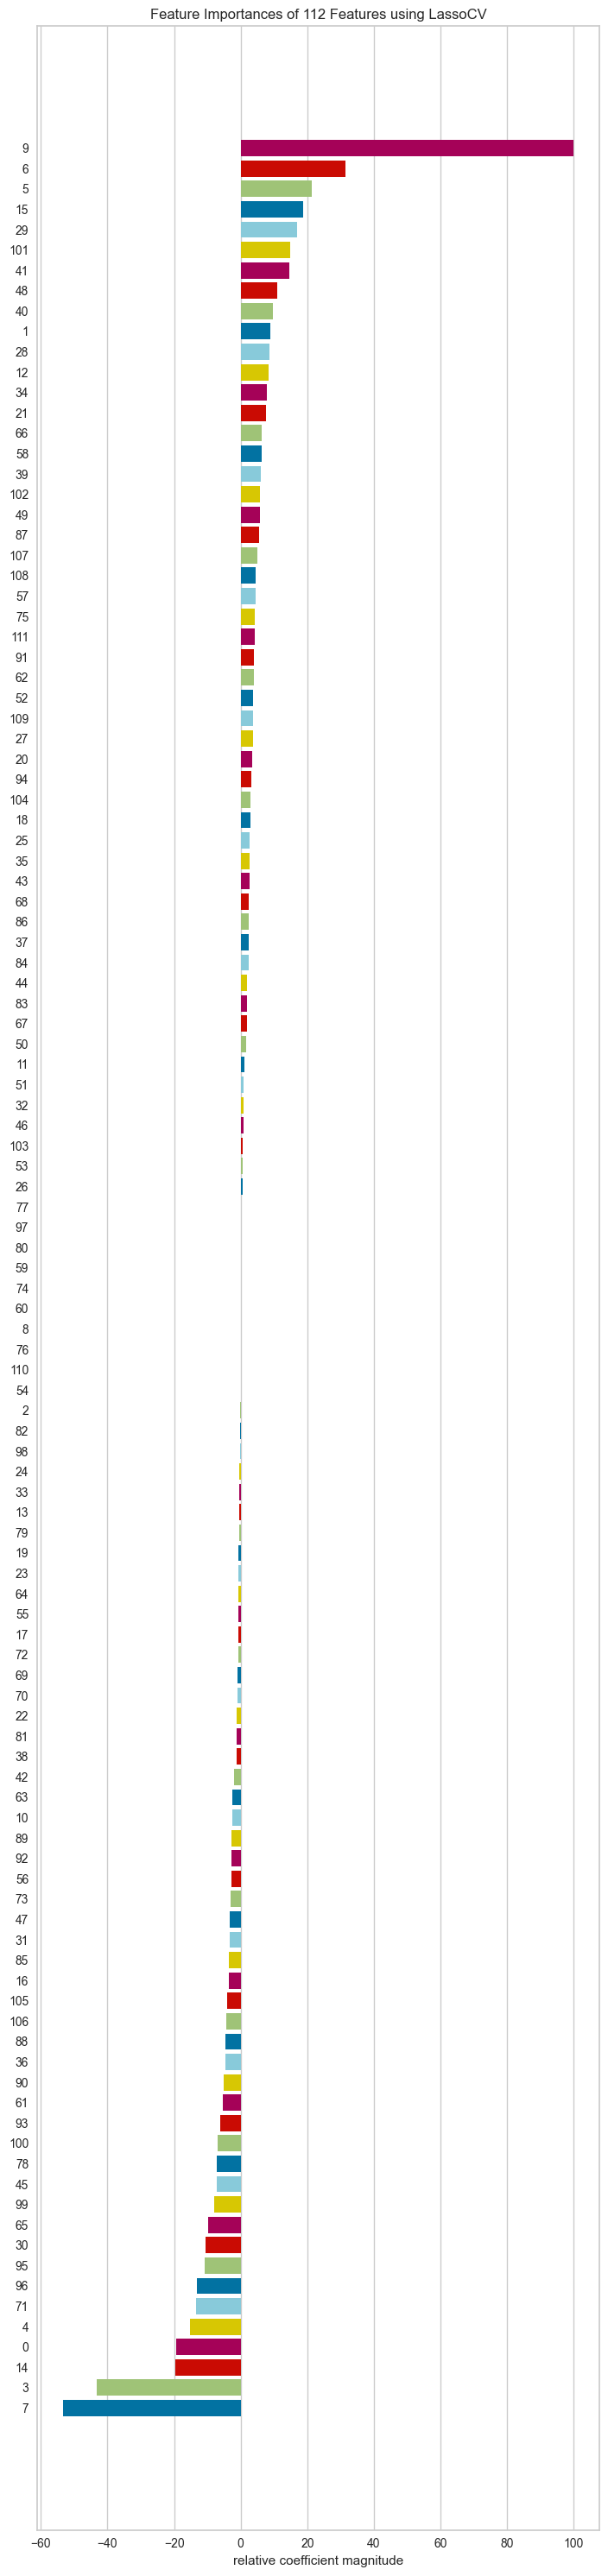

<Axes: title={'center': 'Feature Importances of 112 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [265]:
viz = FeatureImportances(lasso_cv, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720,3000))
viz.fit(X_train, y_train)
viz.show()

In [266]:
df.iloc[:,[0,3,4, 5,6,7,9,14,15,29]]

,make_model,vat,km,Type,Fuel,Gears,Previous_Owners,Gearing_Type,Displacement_cc,Electrically heated windshield
0,0,1,56013.000000,4,1,7.0,2.0,0,1422.0,0
1,0,0,80000.000000,4,0,7.0,1.0,0,1798.0,0
2,0,1,83450.000000,4,1,7.0,1.0,0,1598.0,0
3,0,1,73000.000000,4,1,6.0,1.0,0,1422.0,0
4,0,1,16200.000000,4,1,7.0,1.0,0,1422.0,0
...,...,...,...,...,...,...,...,...,...,...
15910,8,1,1647.362609,2,1,6.0,1.0,0,1997.0,0
15911,8,1,9900.000000,4,0,7.0,1.0,0,1798.0,1
15912,8,1,15.000000,3,1,6.0,1.0,0,1997.0,1
15913,8,1,10.000000,3,1,6.0,1.0,0,1997.0,0


## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
elastic_cv = ElasticNet(max_iter = 10000, random_state = 42)

In [269]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [270]:
grid_model = GridSearchCV(estimator= elastic_cv,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2)

In [271]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.4s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [272]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [273]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [274]:
gscv = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gscv

,GridSearch_train,GridSearch_test
R2,8.448833e-01,8.411148e-01
mae,2.110798e+03,2.132470e+03
mse,8.532153e+06,8.320393e+06
rmse,2.920985e+03,2.884509e+03


## <font color='blue'> <b>Model Comparison</b><font color='black'>

In [275]:
pd.concat([lrr, rcv,lcv,ecv,gscv], axis = 1).round(3)

,linear_train,linear_test,Ridge_CV_train,Ridge_CV_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.845,0.841,0.845,0.841,0.845,0.841,0.845,0.841,0.845,0.841
mae,2111.075,2133.080,2110.845,2132.580,2110.182,2130.678,2110.168,2130.087,2110.798,2132.470
mse,8531986.797,8324429.396,8532211.708,8321343.862,8535844.522,8308631.582,8539871.264,8306538.581,8532152.637,8320392.735
rmse,2920.956,2885.209,2920.995,2884.674,2921.617,2882.470,2922.306,2882.107,2920.985,2884.509


## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42